## **Time Series Prediction With Smoothing Methods**

The second part of Konrad's series deals with the application of vintage time series prediction methods, namely **Exponential Smoothing**, which have been around since the 1950s. According to Konrad's [NB](https://www.kaggle.com/code/konradb/ts-1a-smoothing-methods):
> ...(these) ideas were variations around the topic of exponential smoothing: weighted averages of past observations, with the weights decaying exponentially as the observations get older. A huge practical advantage of those methods that one only needs the previous smoothed value and current time series value to create a forecast for the next step - an important aspect in an era when a computer had less memory than a cheapest smartphone available in the market today.

> As computing power became more available, exponential smoothing methods started fading into the "historical" section of statistics guide - until people started realizing that with the latency requirements of trading or e-commerce, speed is more important that additional 5pct improvement in error and one-step forecasts started making a comeback.

In [1]:
import pandas as pd
from pandas.plotting import autocorrelation_plot
import numpy as np
from random import gauss, random
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing, Holt
import warnings, itertools
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
warnings.simplefilter(action='ignore', category=FutureWarning)

In [8]:
# NB and plotting settings
data = 'data/'
class CFG:
    img_dim1 = 20
    img_dim2 = 10

# Display parameters
plt.rcParams.update({'figure.figsize': (CFG.img_dim1, CFG.img_dim2)})

## Method 1: Exponential Smoothing
### EWMA

Often referred to as the prediction simplist method for time series, Exponential Smoothing basically involves:
1. Taking a simple weighted average of the past and the present data.
2. Interpreting the smoothing factor - trading recency vs smoothing. This is selected either on the basis of expert judgments or is estimated.
3. Smoothing needs time to "catch up" with the dynamics of the time series. Heuristics for reasonable sample sizes state that we need $3/$$\alpha$ observations.
4. Exponentiality is hidden in the recursiveness of the function.
5. Can be used in the absence of a trend or seasonal pattern.
6. Out of sample, the forecast is equal to the most recent value of the smoothed series.

In [9]:
# Load data
df = pd.read_csv(data + 'exp1.csv', header=None)
df.columns = ['series']

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   series  131 non-null    float64
dtypes: float64(1)
memory usage: 1.1 KB


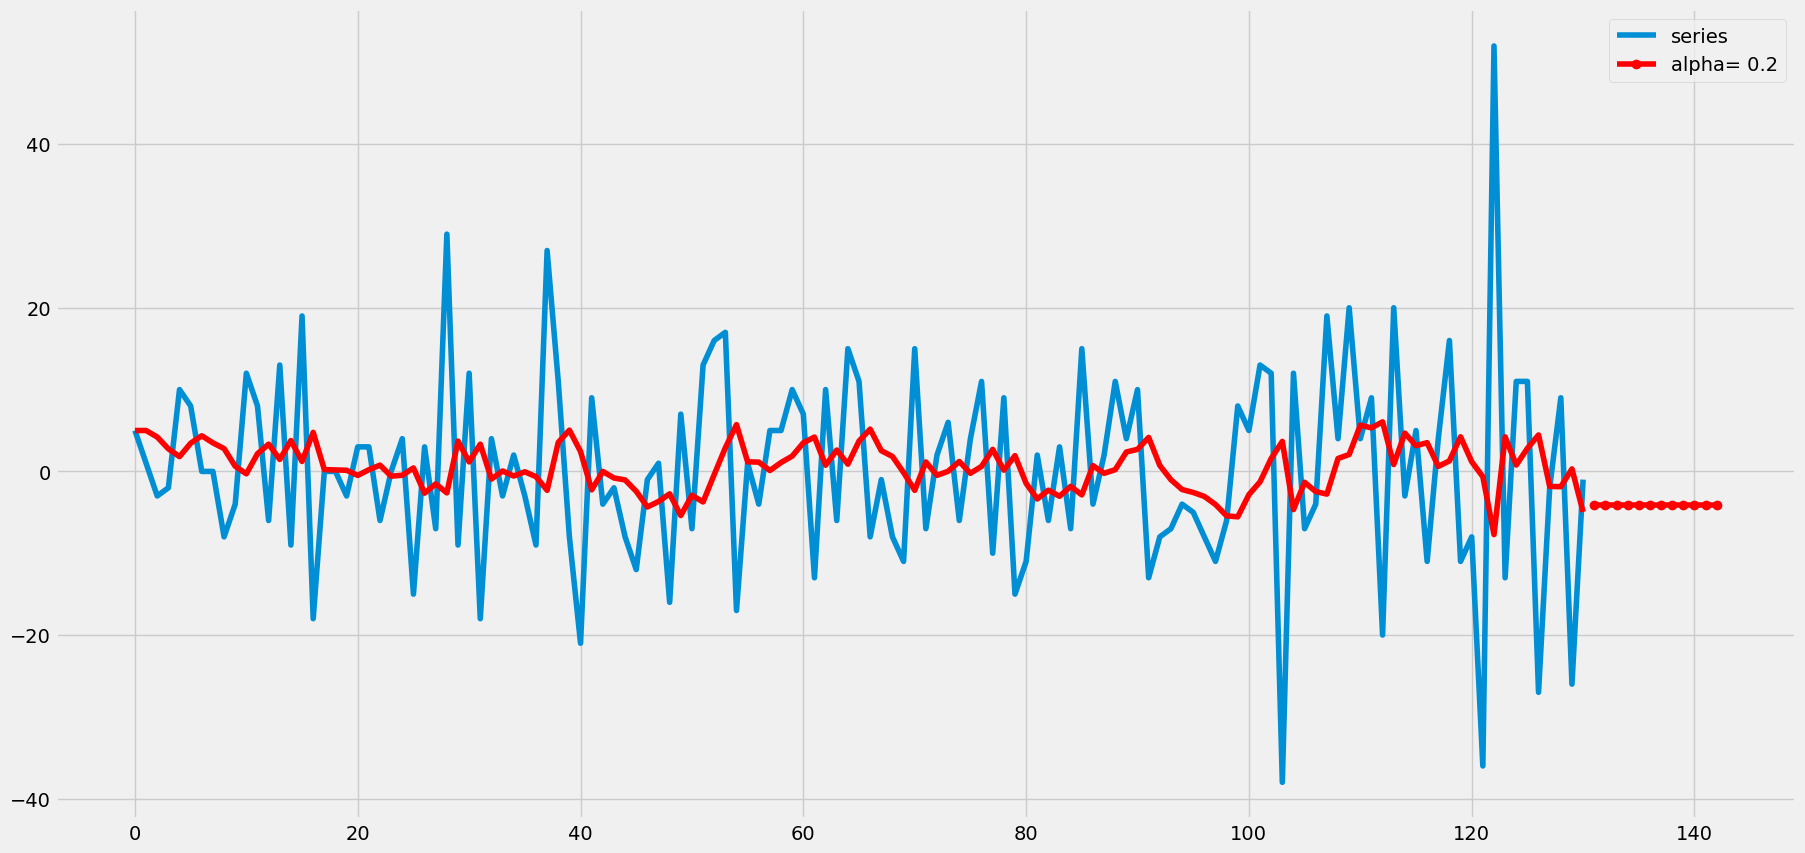

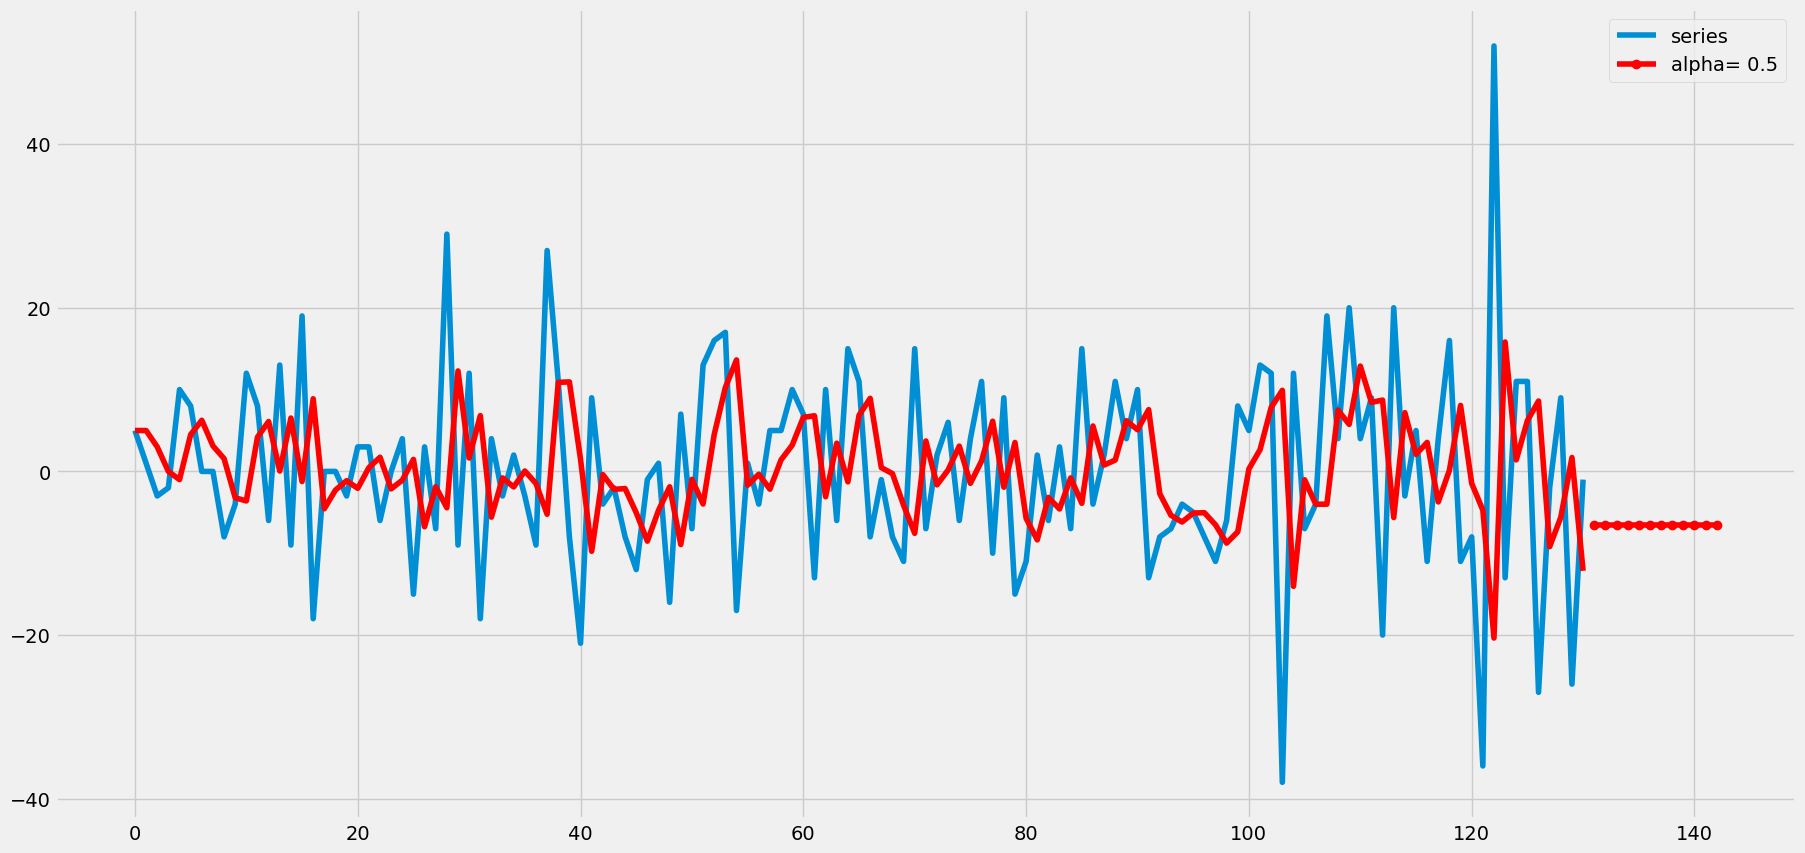

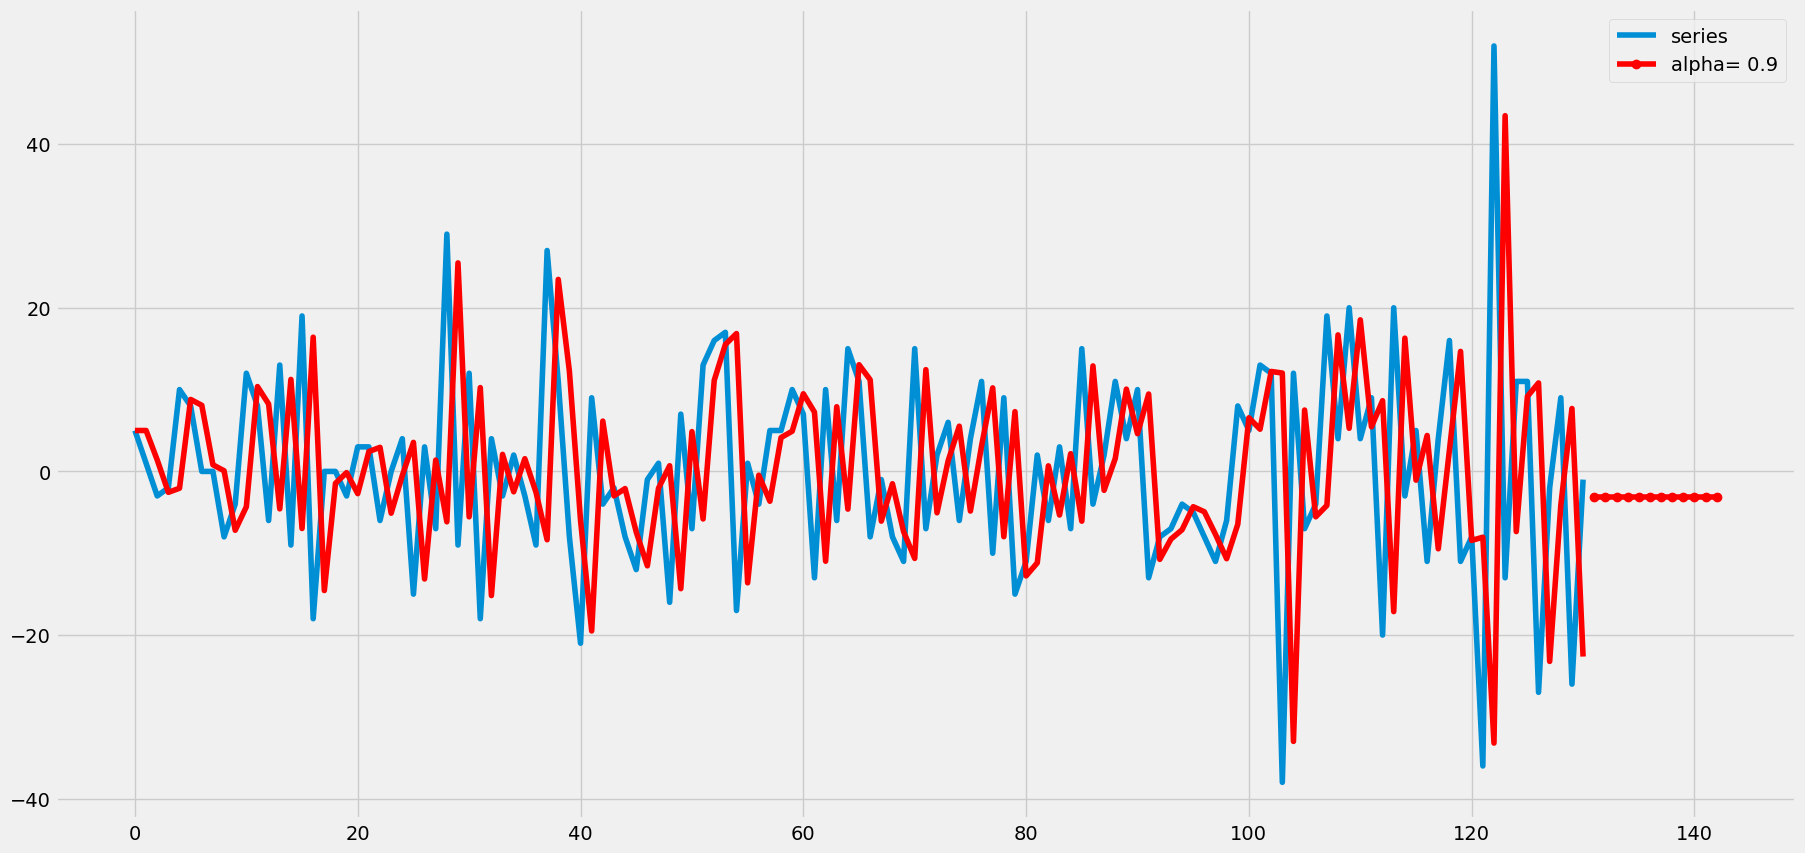

In [11]:
# Applying exponential smoothing, with varying alphas.
for alpha_sm in [0.2, 0.5, 0.9]:
    df.plot.line()
    fit1 = SimpleExpSmoothing(df).fit(smoothing_level=alpha_sm, optimized=False)
    fcast1 = fit1.forecast(12).rename('alpha= ' + str(alpha_sm))
    fcast1.plot(marker='o', color='red', legend=True)
    fit1.fittedvalues.plot(color='red')
    plt.show();

- Small values of the smoothing constant $\alpha$ removes most of variations, whereas larger values overfit the model and result in almost no smoothing. 

`Konrad's Tip` Always check the parameterization if working on someone else's exponential smoothing model.



In [ ]:
# Loading passengers data
df = pd.read_csv(data + 'passengers.csv', usecols=['passengers'])

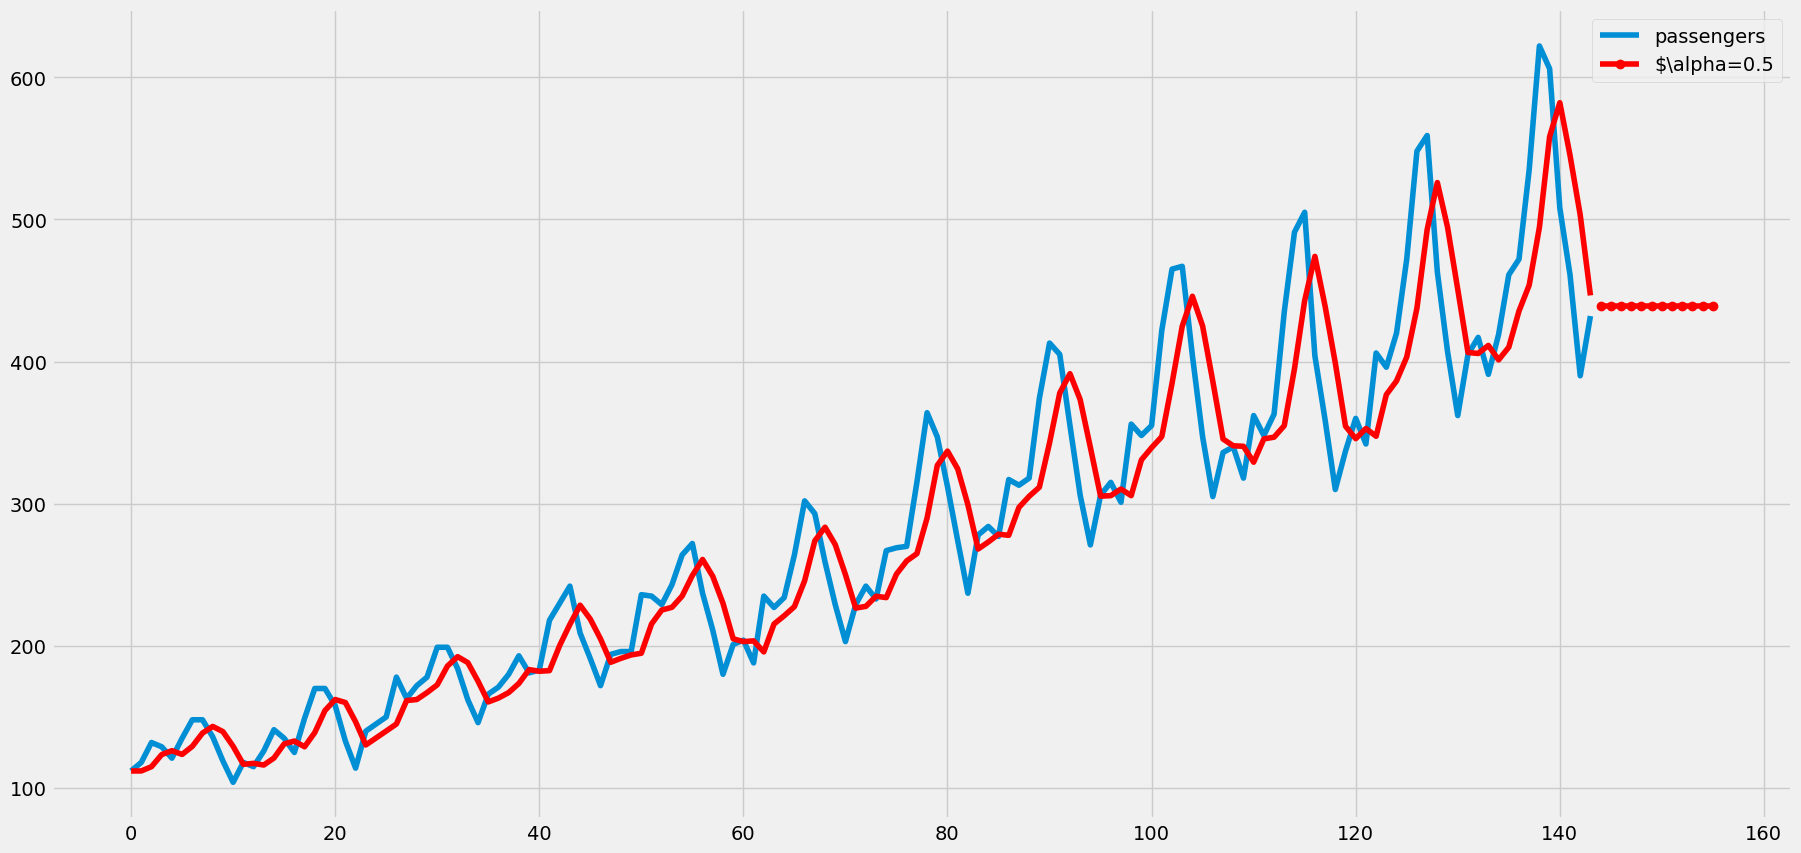

In [13]:
# Applying exponential smoothing to the passenger's dataset.
alpha = 0.5

df.plot.line()
fit1 = SimpleExpSmoothing(df).fit(smoothing_level=alpha, optimized=False)
fcast1 = fit1.forecast(12).rename(r'$\alpha=0.5')
fcast1.plot(marker='o', color='red', legend=True)
fit1.fittedvalues.plot(color='red')
plt.show()

### Double Exponential Smoothing.

Double Exponential Smoothing (aka Holt method) adds trend on top of the level and, as we learnt to predict the intercept with previous methods, the same exponential shall be applied to this additional component. The assumption is that the future direction of the time series depends on the previous weighted changes.

Thus the prediction is composed of the sum of the level and the trend - with the addition of a second parameter to smooth the trend. The advantage over simple Exponential Smoothing is that we no longer have a flat forecasting function.

In [ ]:
font_dict = {}

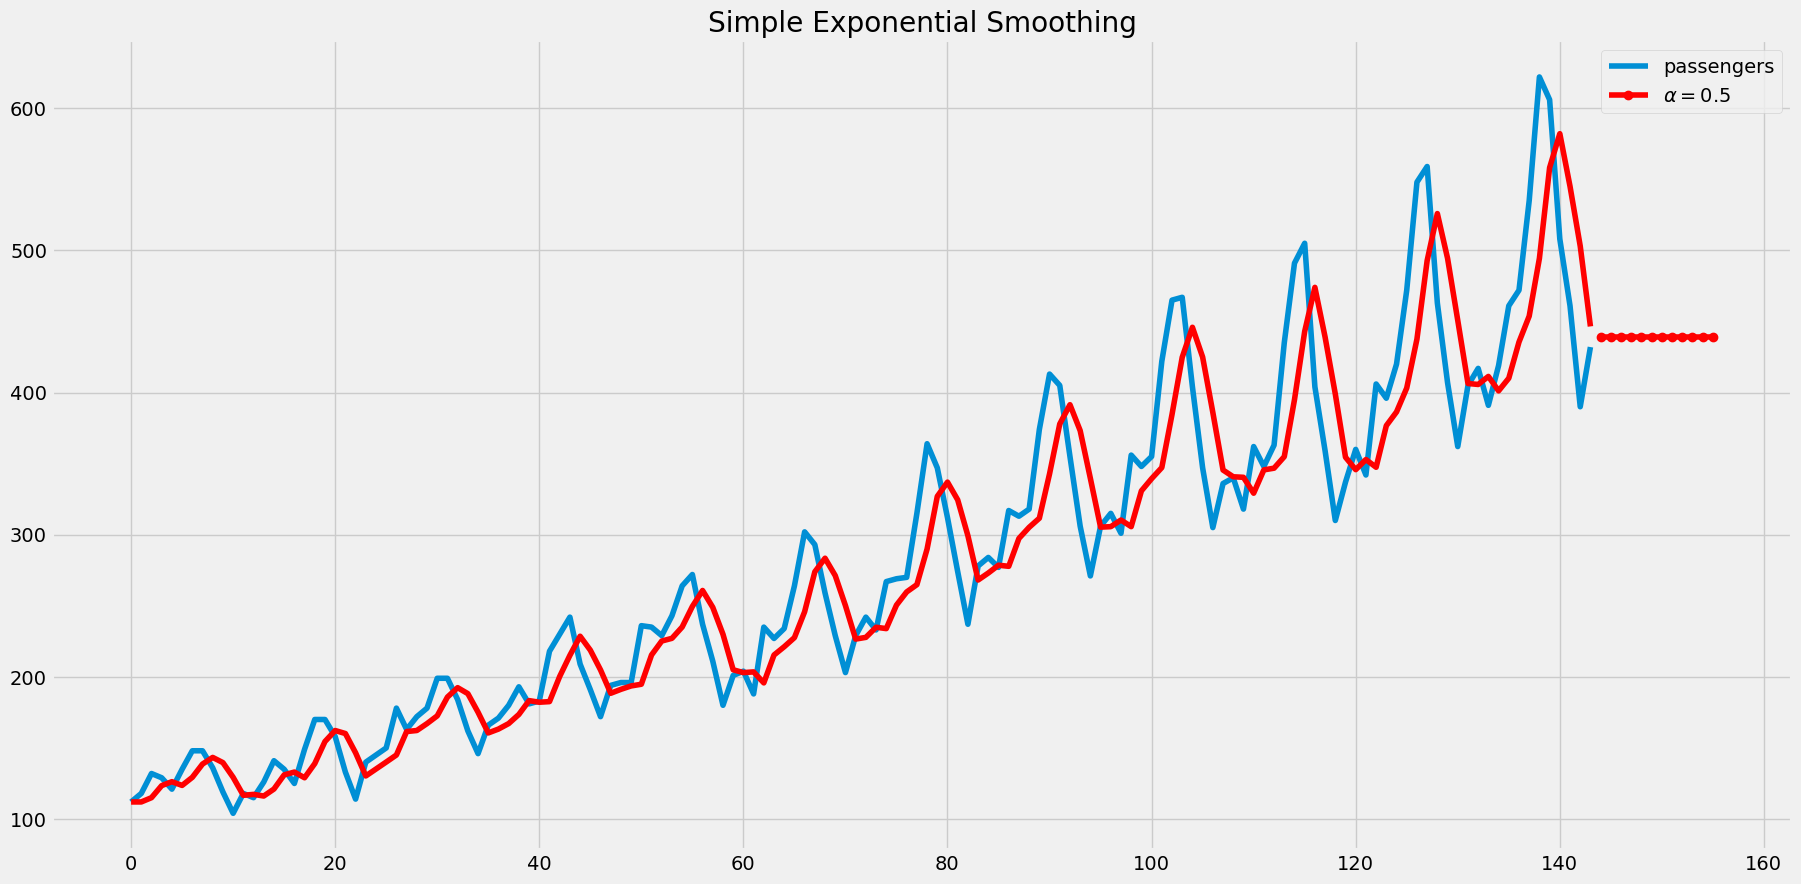

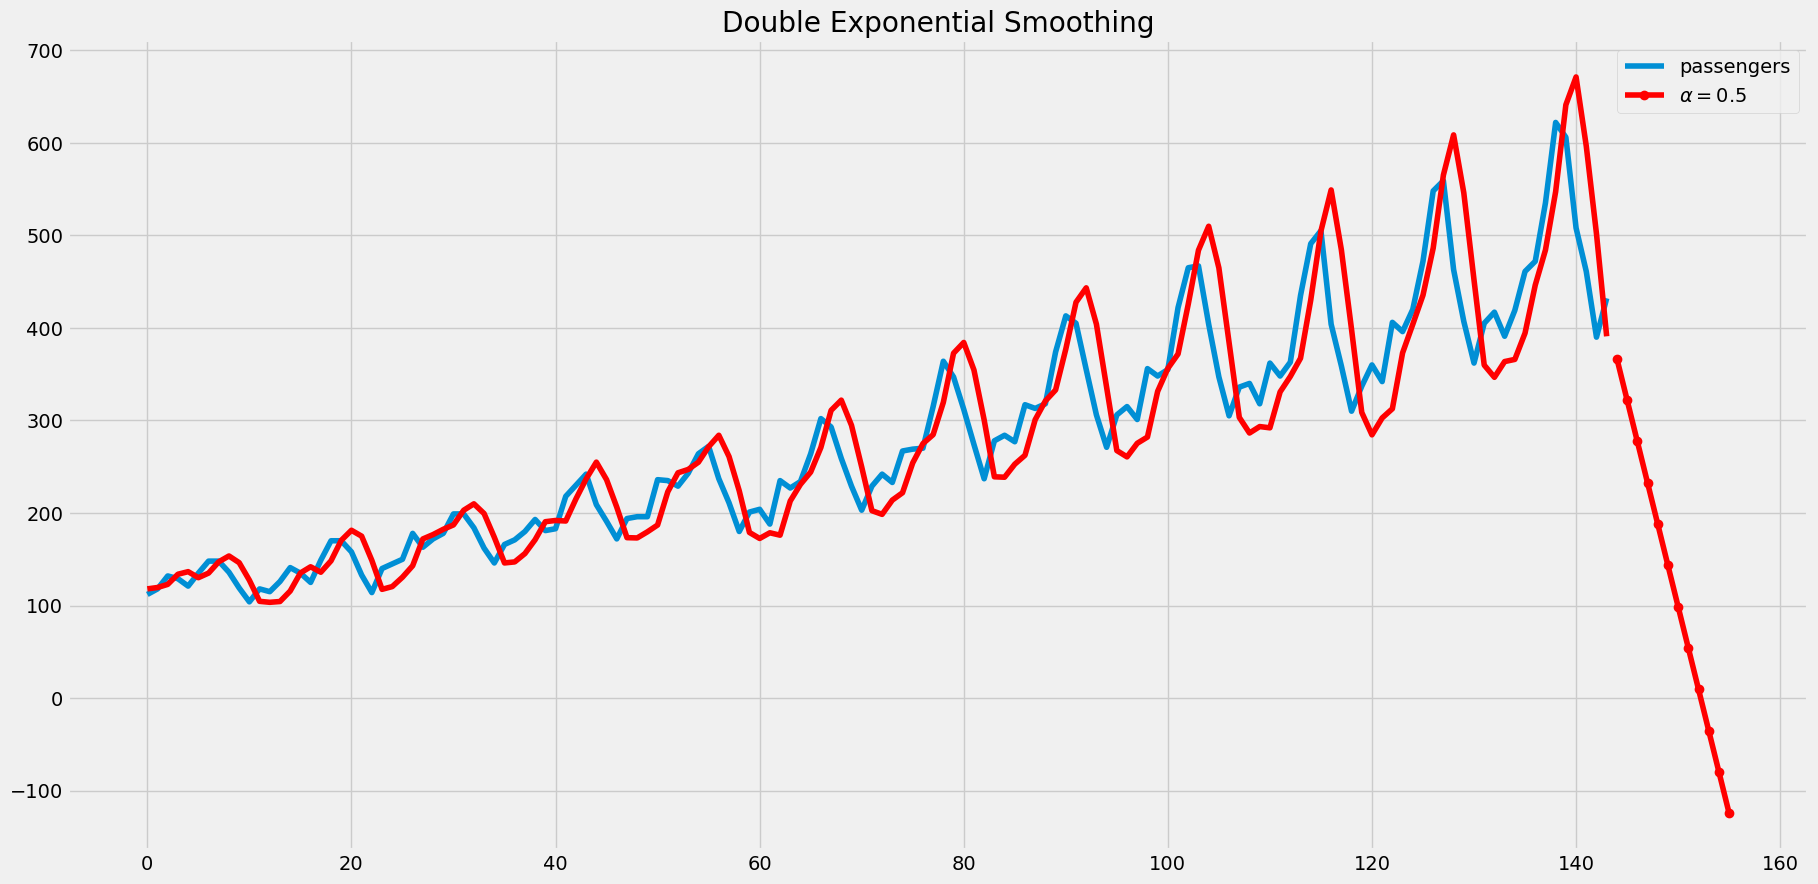

In [18]:
alpha = 0.5
# Simple Exponential Smoothing for reference
df.plot.line()
fit1 = SimpleExpSmoothing(df).fit(smoothing_level=alpha, optimized=False)
fcast1 = fit1.forecast(12).rename(r'$\alpha=0.5$')
fcast1.plot(marker='o', color='red', legend=True)
fit1.fittedvalues.plot(color='red')
plt.title('Simple Exponential Smoothing')
plt.show()

# Double Exponential Smoothing
df.plot.line()
fit2 = Holt(df).fit(smoothing_level=0.5, smoothing_slope=0.5, optimized=False)
fcast2 = fit2.forecast(12).rename(r'$\alpha=0.5$')
fcast2.plot(marker='o', color='red', legend=True)
fit2.fittedvalues.plot(color='red')
plt.title('Double Exponential Smoothing')
plt.show();


The addition of a second component allows us to extrapolate the most recent trend. However, this is still a long way off from generating useful forecasts.

### Triple Exponential Smoothing

Building on the concept of adding additional components to the mix, we can also add a smoothed seasonal component. This is called the Holt-Winters method.

> The most important addition is the seasonal component to explain repeated variations around intercept and trend, and it will be specified by the period. For each observation in the season, there is a separate component; for example, if the length of the season is 7 days (a weekly seasonality), we will have 7 seasonal components, one for each day of the week. An obvious, yet worth repeating caveat: it makes sense to estimate seasonality with period $L$ only if your sample size is bigger than $2L$.


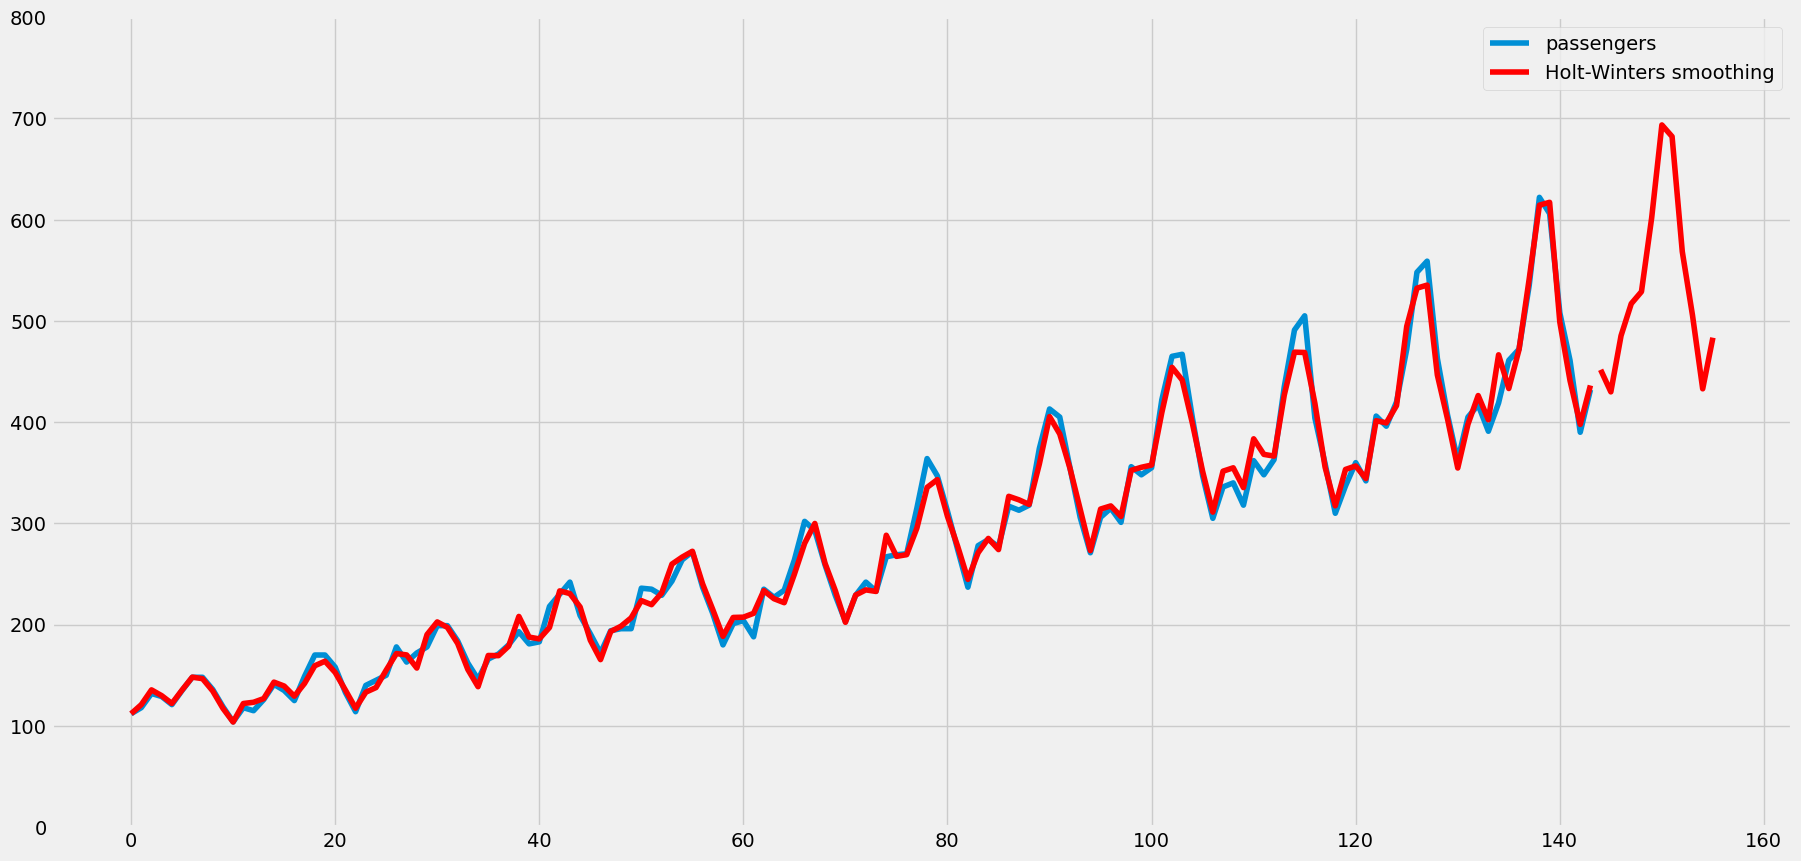

In [25]:
df.plot.line()
fit1 = ExponentialSmoothing(df, seasonal_periods=12, trend='add', 
                            seasonal='add', use_boxcox=True)
fit1 = fit1.fit(smoothing_level=0.5)
fit1.fittedvalues.plot(color='red')
fit1.forecast(12).rename("Holt-Winters smoothing").plot(color='red', legend=True)

plt.ylim(0, 800) 
plt.show();

## Anomaly Detection

In anomaly detection, it is useful to remember that often the simplest tools like Z-scores tend to be the most effective for detecting anomalies - especially in a univariate setting. Based on the CLT (Central Limit Theorem), most data behaves like a Gaussian distribution after sufficient normalization. Of course, this only works if the underslying assumptions for CLT are met.

> The calculation of the Z-score for each individual point in the series proceeds in the following manner:
> - select a window size w
> - calculate rolling mean / standard deviation with window w
> - demean and normalize by sd: 

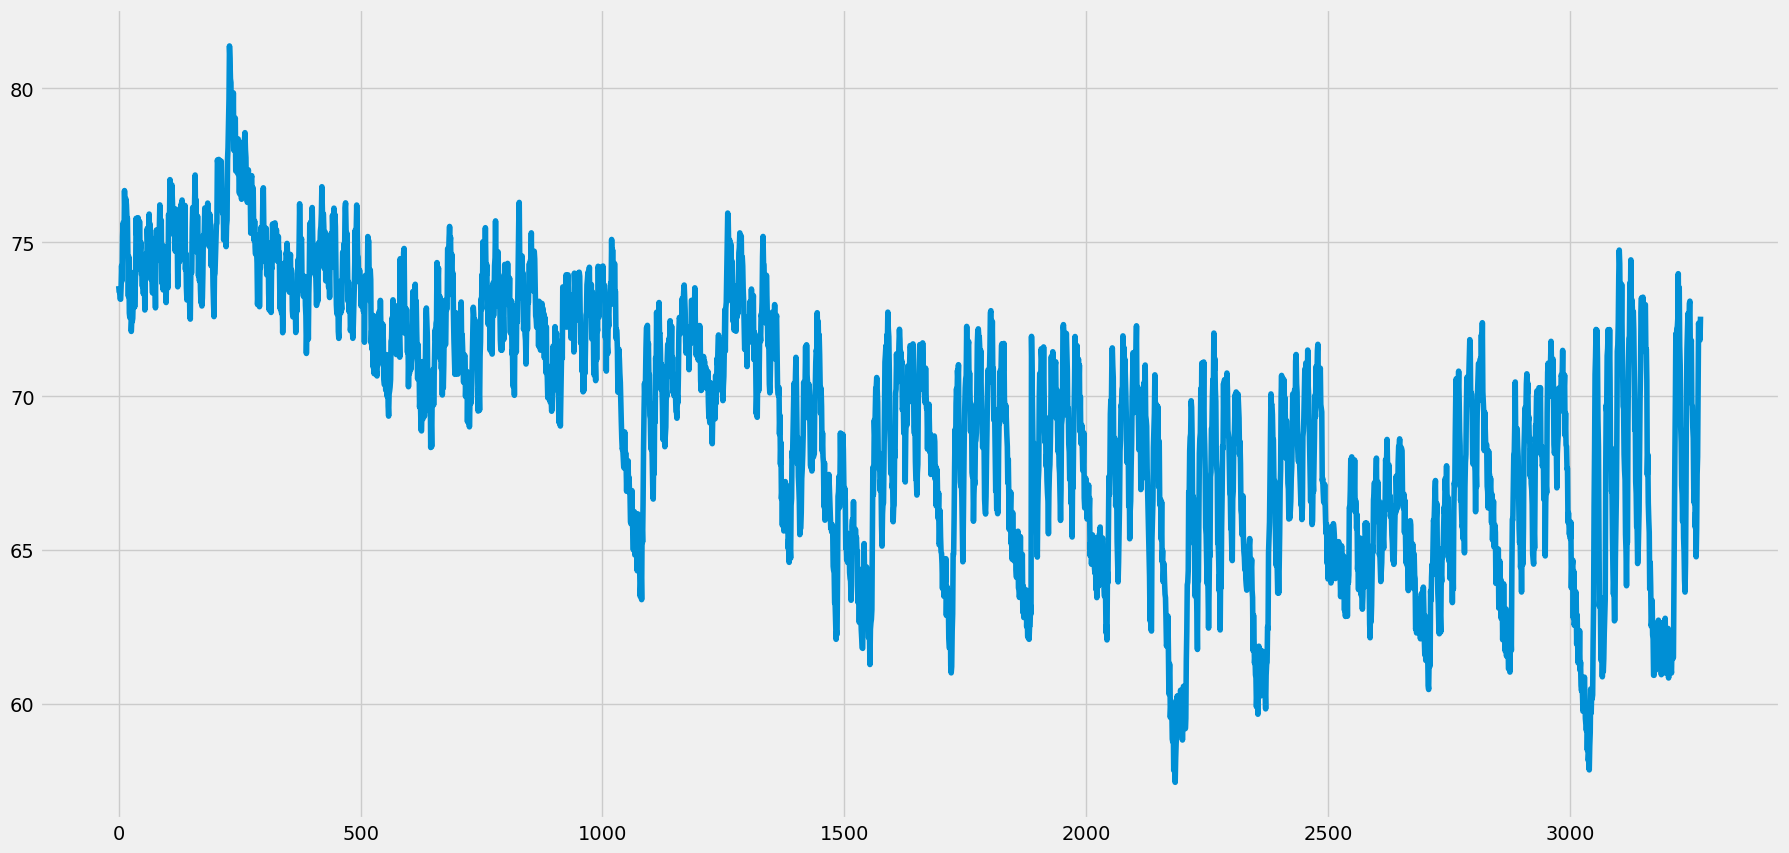

In [26]:
# Load ambient temperature data
series = pd.read_csv(data + 'ambient_temperature_system_failure.csv')
series['timestamp'] = pd.to_datetime(series['timestamp'])

# Plot
series['value'].plot();

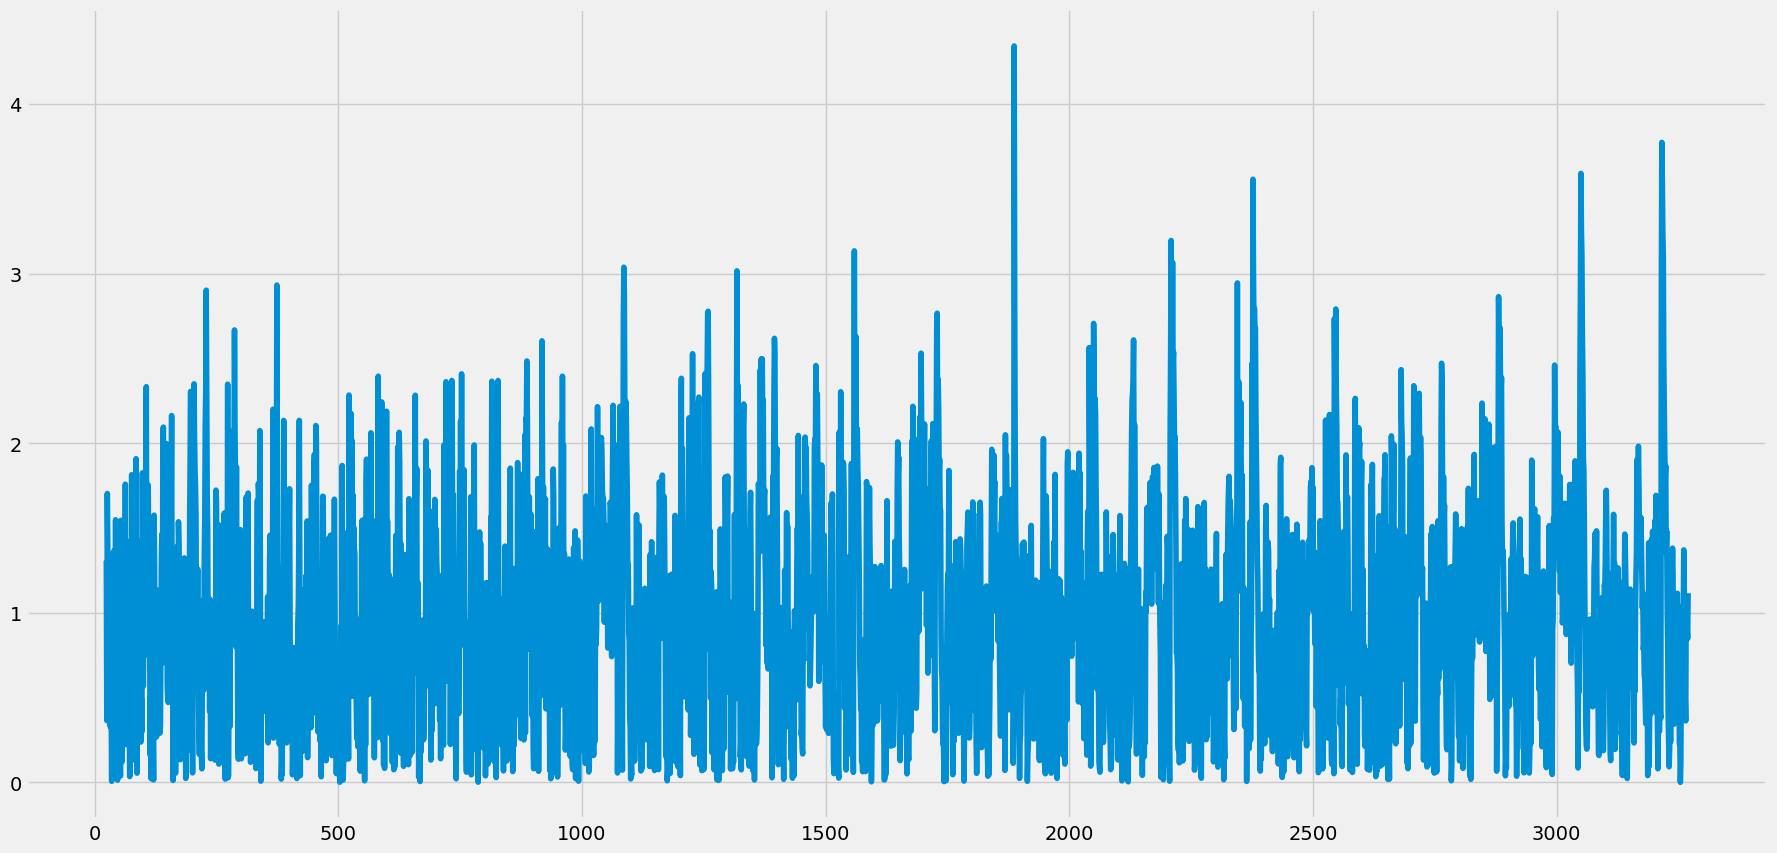

In [28]:
# Pick a window size
window_size = 25

# Calculate rolling mean and std.
xroll = series['value'].rolling(window_size)
series['mean_roll'] = xroll.mean()
series['std_roll'] = xroll.std()

# Calculate Z-score
series['zscore'] = np.abs((series['value'] - series['mean_roll']) / series['std_roll'])
series['zscore'].plot();

In [33]:
# Creating a list of observation falling outside the acceptable range
series.loc[series['zscore'] > 3][['timestamp', 'value']].round(3)

,timestamp,value
1086,2014-02-17 13:00:00,69.519
1318,2014-02-27 05:00:00,69.426
1559,2014-03-10 11:00:00,67.688
1887,2014-03-24 19:00:00,71.943
2209,2014-04-14 10:00:00,63.873
2212,2014-04-14 13:00:00,66.890
2377,2014-04-21 10:00:00,64.917
2378,2014-04-21 11:00:00,65.397
3050,2014-05-19 11:00:00,66.461
3051,2014-05-19 12:00:00,68.262


# Building a Predictive Model Based on What We've Learnt

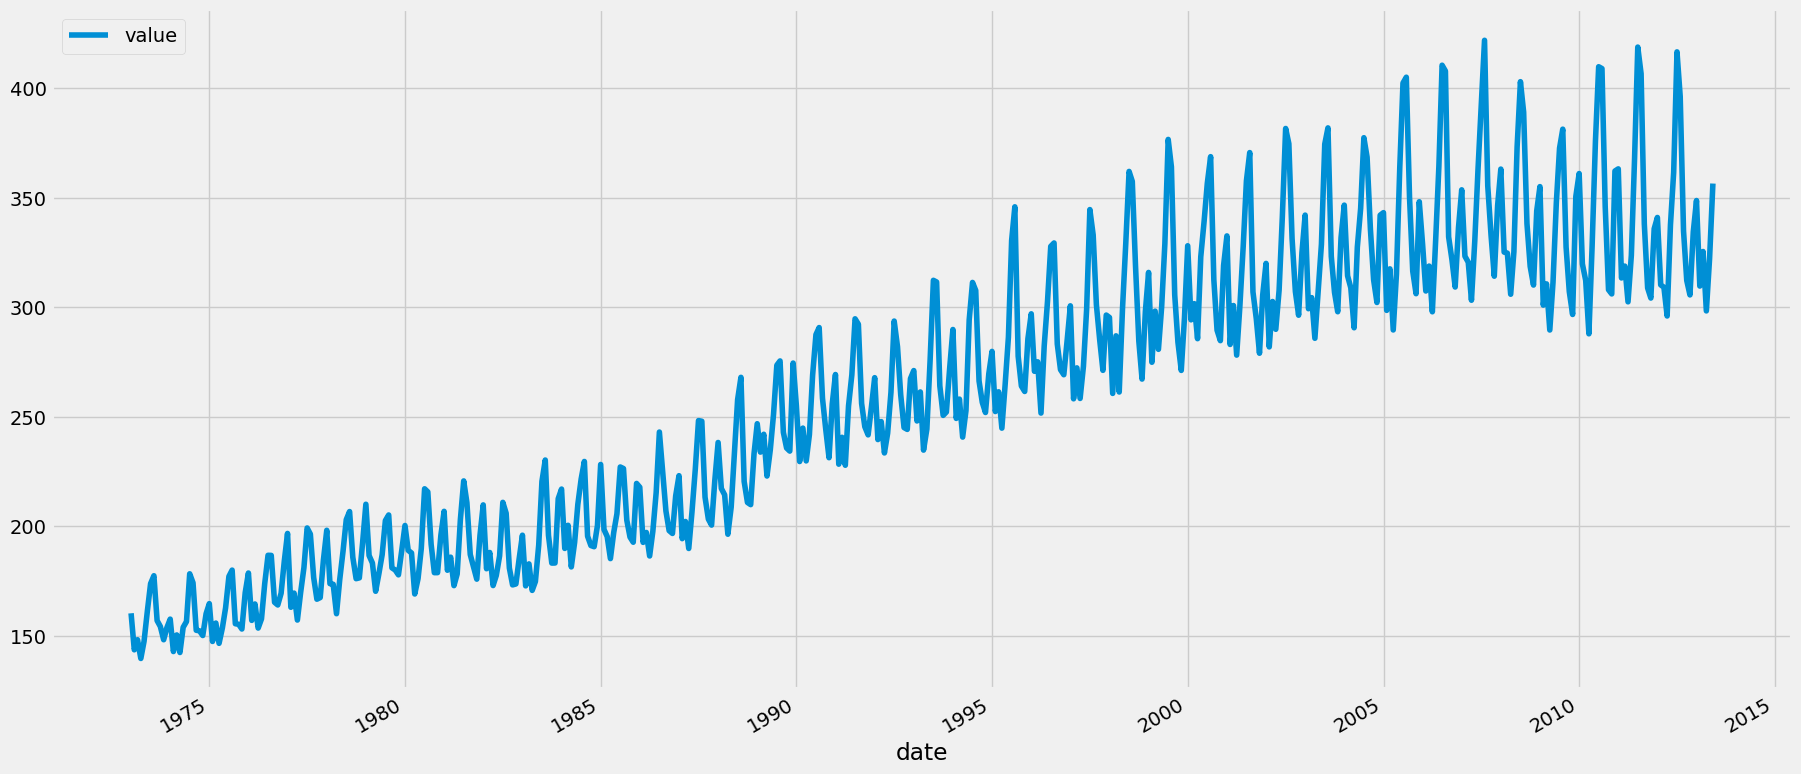

In [34]:
# Loading data on US daily energy consumption - measured in billion kWh
df = pd.read_csv(data + 'us_energy.csv')
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
df.plot();

**Performing seasonal decomposition - additive and multiplicative.**

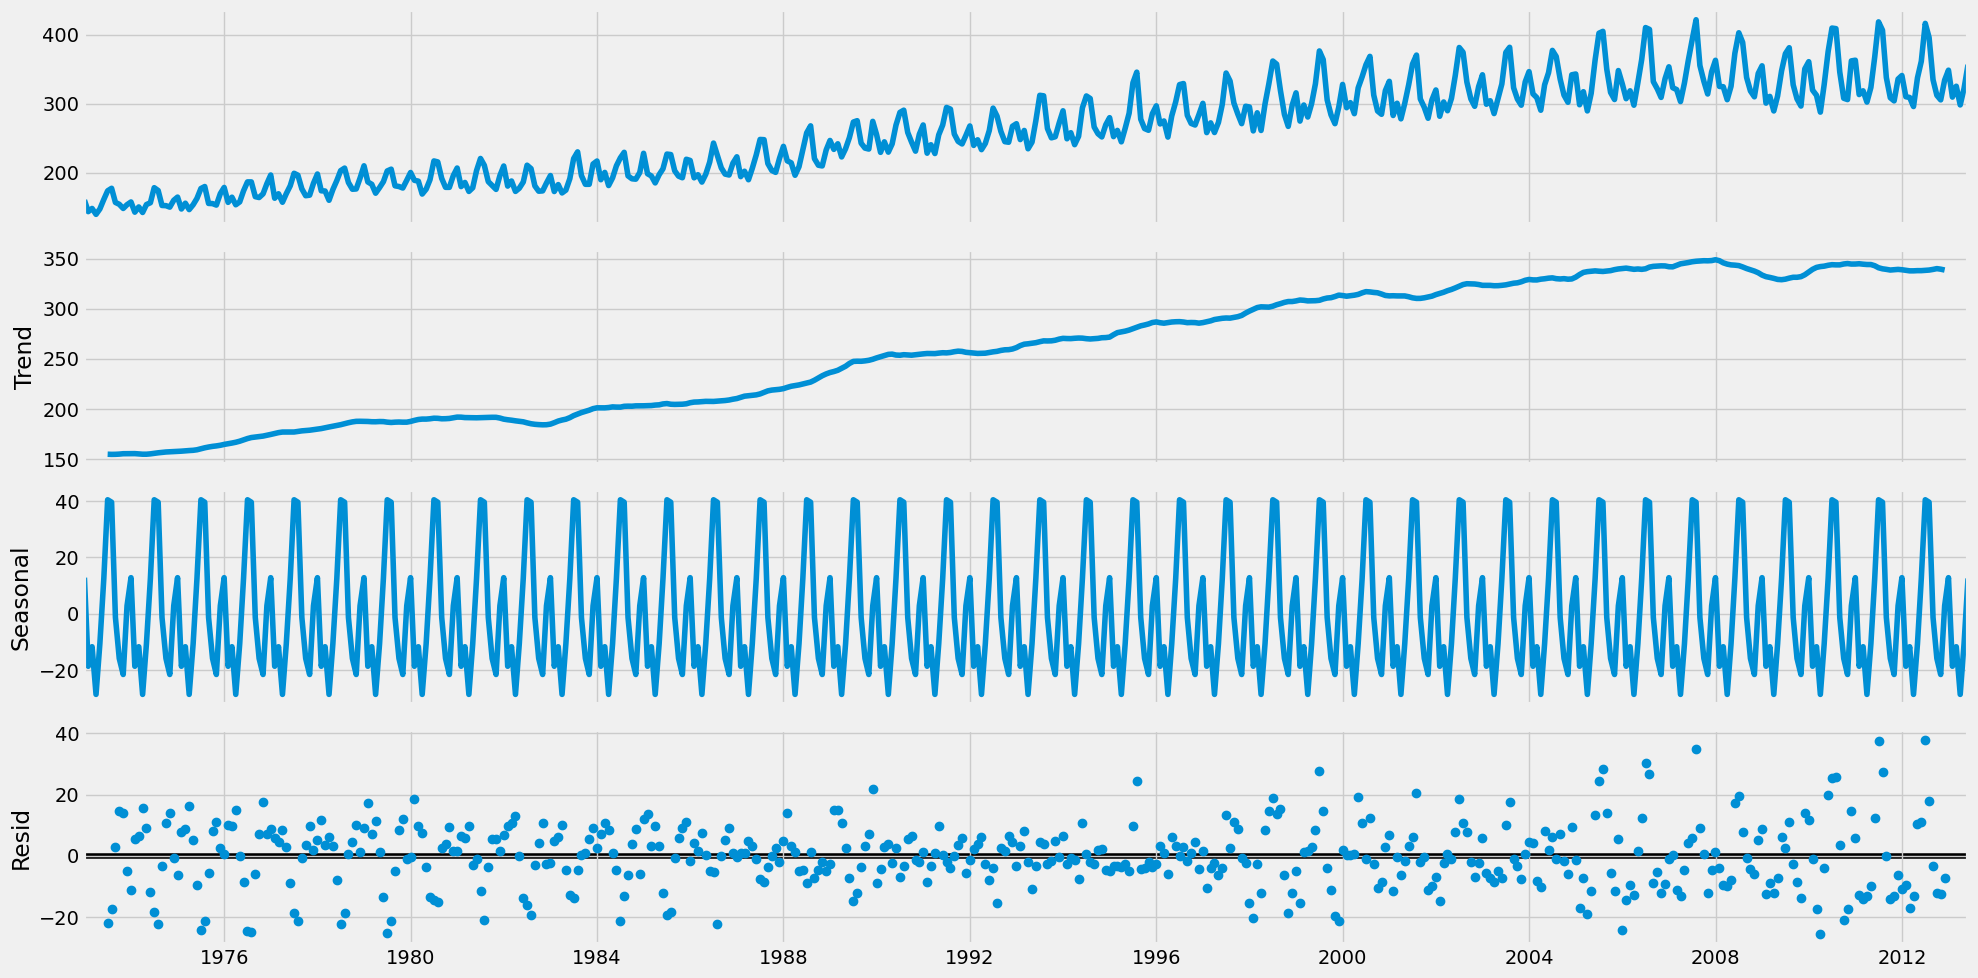

In [35]:
decomp = sm.tsa.seasonal_decompose(df, period=12)
fig = decomp.plot()
plt.show();

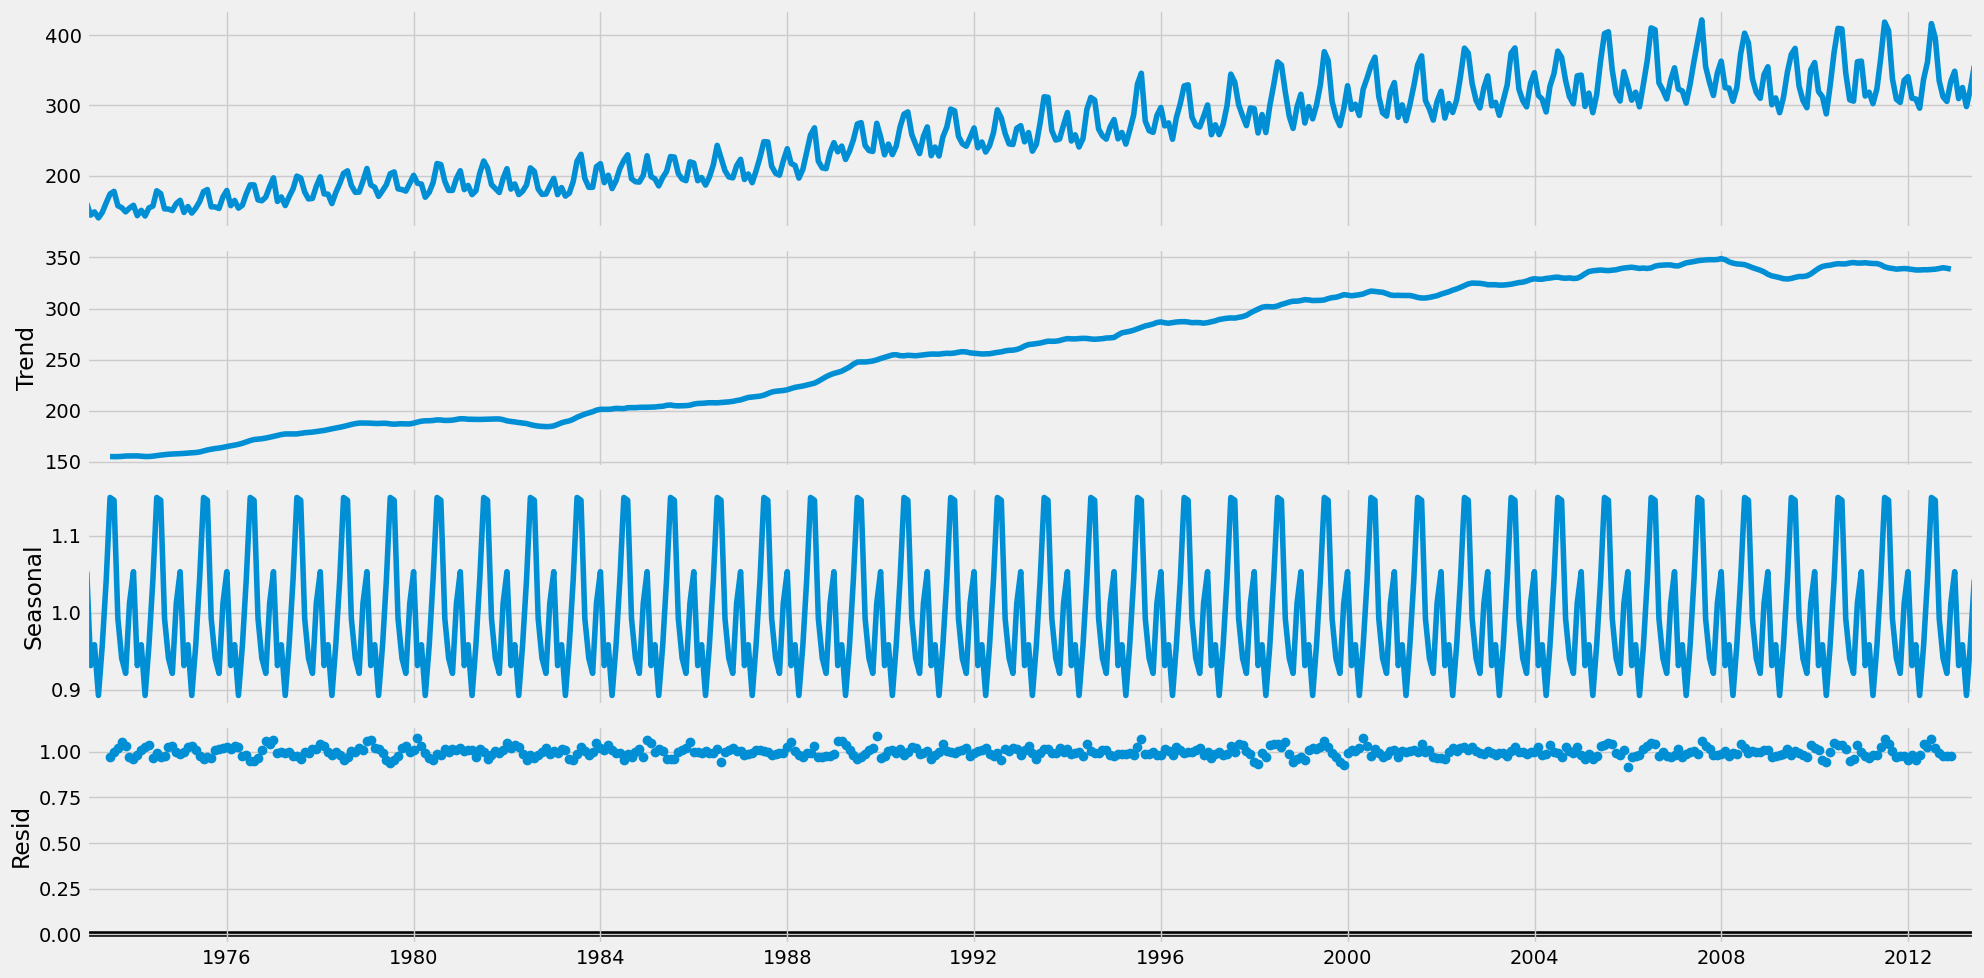

In [36]:
decomp = sm.tsa.seasonal_decompose(df, period=12, model='multiplicative')
fig = decomp.plot()
plt.show();

In addition to having a clear trend and seasonality, the stable residuals suggest that multiplicative decomposition is more appropriate.

**Fitting to the Exponential Smoothing Model**

In [37]:
# Split the data into training and validation
cutoff_date = '2005-12-31'
xtrain, xvalid = df.loc[df.index <= cutoff_date], df.loc[df.index > cutoff_date]
print(xtrain.shape, xvalid.shape)

(397, 1) (89, 1)


In [43]:
xtrain.describe()

,value
count,397.000000
mean,241.667252
std,61.574719
min,139.589000
25%,187.051000
50%,238.188000
75%,289.848000
max,404.941000


In [44]:
# Fitting the model
m = ExponentialSmoothing(xtrain['value'].values, seasonal_periods=12, 
                         trend='mul', seasonal='mul', use_boxcox=True)
m = m.fit()
# FYI there is a potential rescaling issue with Exponential Smoothing. The issue seems to be pretty recent as of June, 24.

/home/bchaudhry/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [45]:
m.params_formatted

,name,param,optimized
smoothing_level,alpha,2.903401e-01,True
smoothing_trend,beta,5.289519e-18,True
smoothing_seasonal,gamma,1.898773e-01,True
initial_level,l.0,5.447314e+00,True
initial_trend,b.0,1.000400e+00,True
initial_seasons.0,s.0,1.011021e+00,True
initial_seasons.1,s.1,9.846571e-01,True
initial_seasons.2,s.2,9.908987e-01,True
initial_seasons.3,s.3,9.758966e-01,True
initial_seasons.4,s.4,9.871381e-01,True


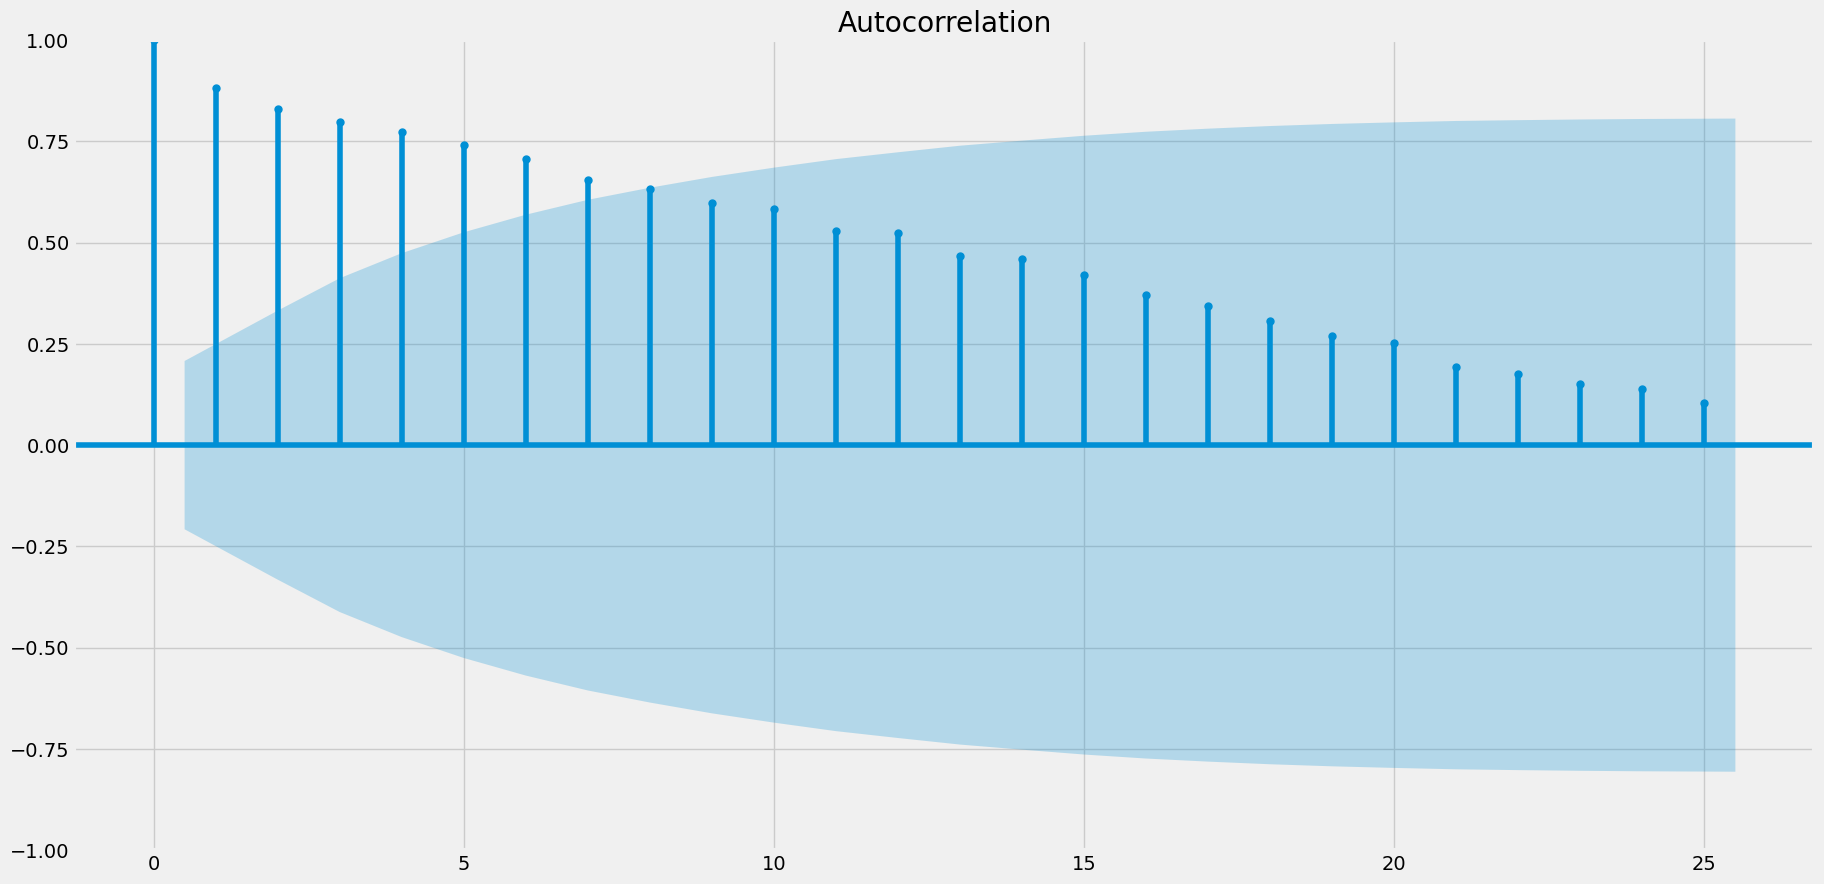

In [47]:
# Assessing our residuals 
prediction = m.forecast(len(xvalid)).copy()

xresiduals = xvalid['value'] - prediction
plot_acf(xresiduals, lags = 25)
print()

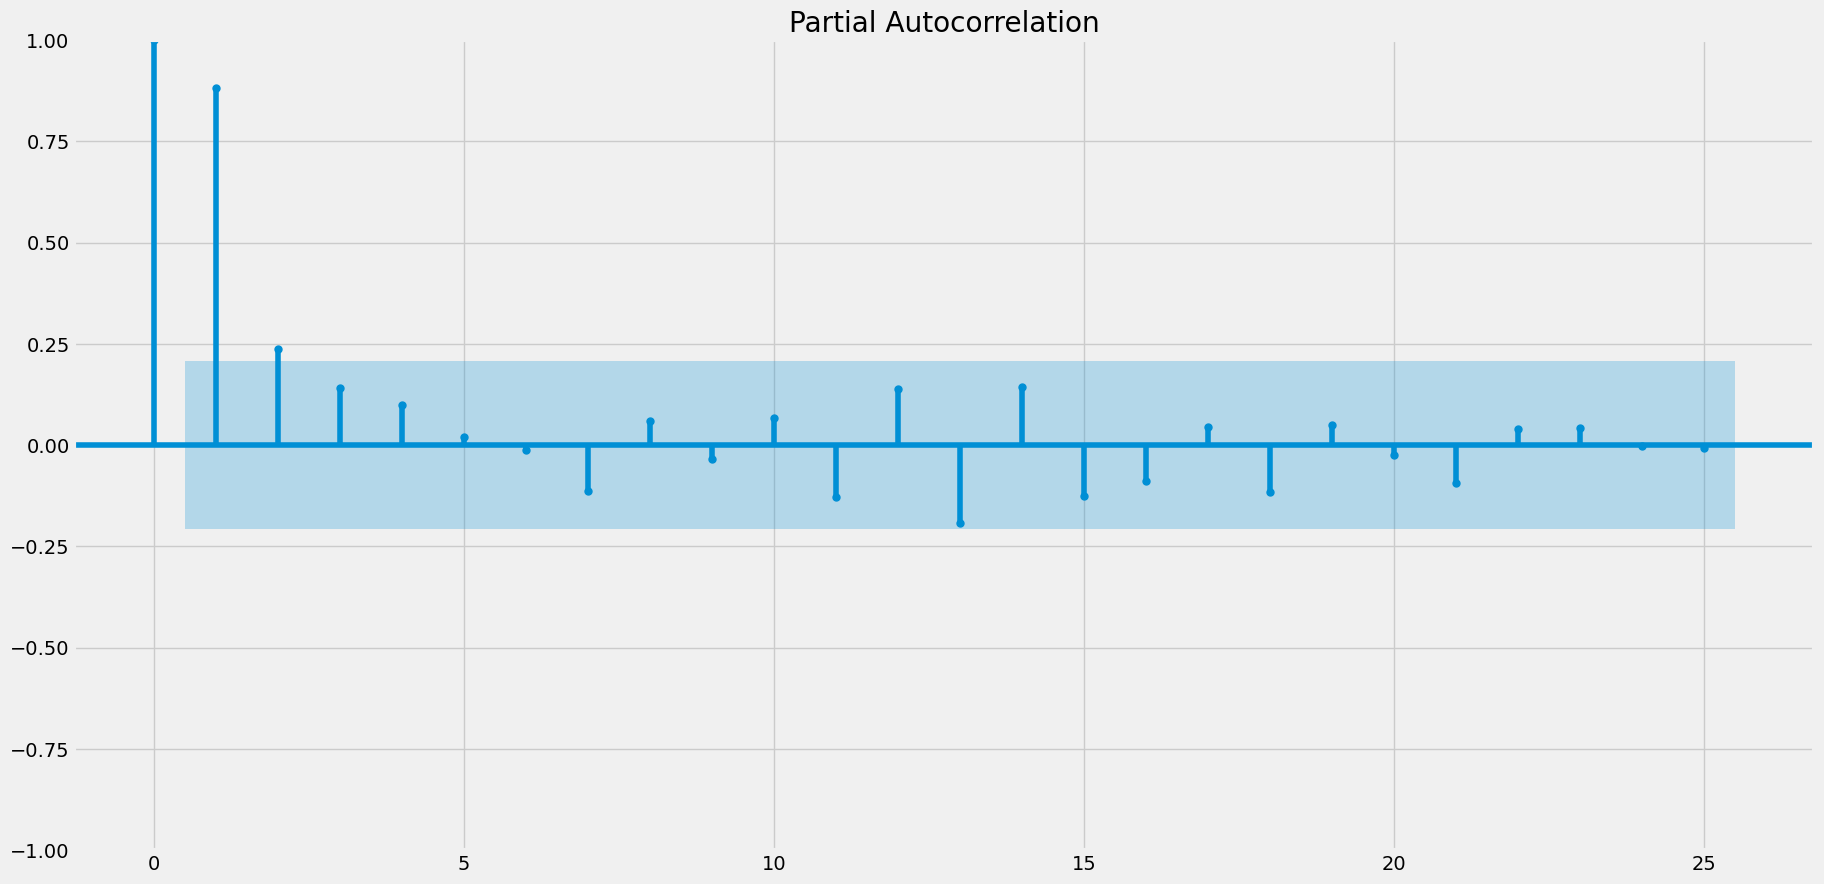

In [48]:
plot_pacf(xresiduals, lags = 25)
print()

The Holt-Winter model seems unable to capture some first and second order dependence based on the outputs of ACF and PACF.

/tmp/ipykernel_414/429941512.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xvalid['prediction'] = prediction


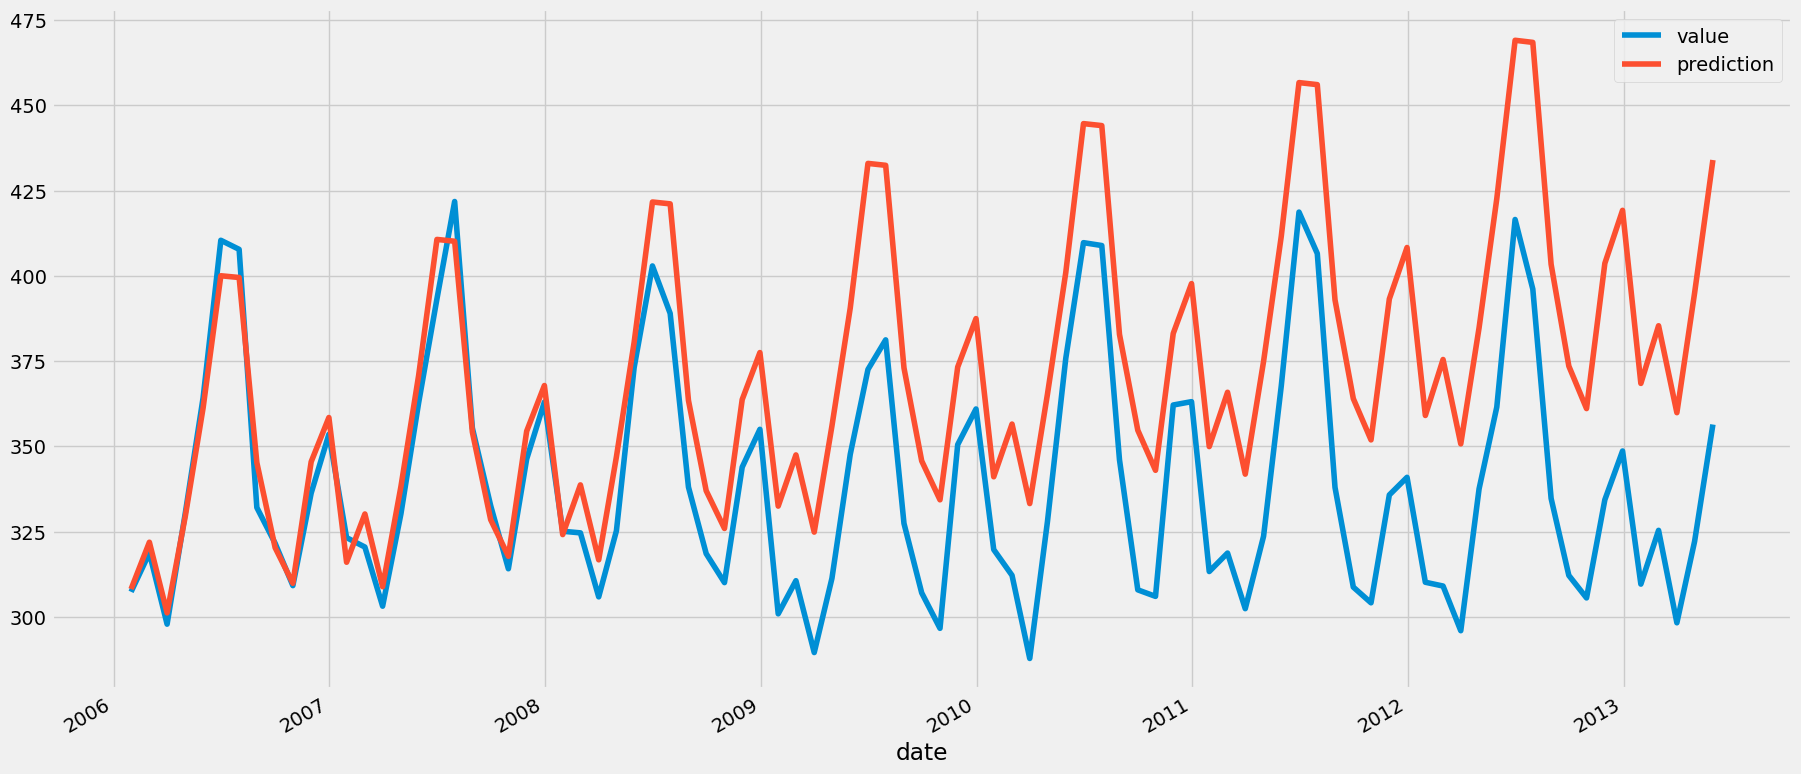

In [49]:
xvalid['prediction'] = prediction
xvalid.plot();